<h2>Project 1: $k$-Nearest Neighbors</h2>
<p><cite><center>So many points,<br>
some near some far,<br>
- who are my true neighbors?</center></cite></p>

<h3>Introduction</h3>

<p>In this project, you will build a $k$-nearest neighbor classifier.</p>

<strong>How to submit:</strong> You can submit your code using the blue <strong>Submit</strong> button above. This button will send any code below surrounded by <strong>#&lt;GRADED&gt;</strong><strong>#&lt;/GRADED&gt;</strong> tags below to the autograder, which will then run several tests over your code. By clicking on the <strong>Details</strong> dropdown next to the Submit button, you will be able to view your submission report once the autograder has completed running. This submission report contains a summary of the tests you have failed or passed, as well as a log of any errors generated by your code when we ran it.

Note that this may take a while depending on how long your code takes to run! Once your code is submitted you may navigate away from the page as you desire -- the most recent submission report will always be available from the Details menu.

<p><strong>Evaluation:</strong> Your code will be autograded for technical
correctness and--on some assignments--speed. Please <em>do not</em> change the names of any provided functions or classes within the code, or you will wreak havoc on the autograder. Furthermore, <em>any code not surrounded by <strong>#&lt;GRADED&gt;</strong><strong>#&lt;/GRADED&gt;</strong> tags will not be run by the autograder</em>. However, the correctness of your implementation -- not the autograder's output -- will be the final judge of your score.  If necessary, we will review and grade assignments individually to ensure that you receive due credit for your work.

<p><strong>Academic Integrity:</strong> We will be checking your code against other submissions in the class for logical redundancy. If you copy someone else's code and submit it with minor changes, we will know. These cheat detectors are quite hard to fool, so please don't try. We trust you all to submit your own work only; <em>please</em> don't let us down. If you do, we will pursue the strongest consequences available to us.

<p><strong>Getting Help:</strong> You are not alone!  If you find yourself stuck  on something, contact the course staff for help.  Office hours, section, and the <a href="https://piazza.com/class/icxgflcnpra3ko">Piazza</a> are there for your support; please use them.  If you can't make our office hours, let us know and we will schedule more.  We want these projects to be rewarding and instructional, not frustrating and demoralizing.  But, we don't know when or how to help unless you ask.  



**Libraries**: Before we get started we need to install a few libraries. You can do this by executing the following code.

In [4]:
#<GRADED>
import numpy as np
# functions that may be helpful
from scipy.stats import mode
#</GRADED>
import sys
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import loadmat
import time
from helper_functions import loaddata, visualize_knn_2D, visualize_knn_images, plotfaces

print('You\'re running python %s' % sys.version.split(' ')[0])

You're running python 3.6.1


<h3> k-Nearest Neighbors implementation in Python </h3>

<p>Our goal towards a $k$NN classifier is to build a classifier for face recognition. 
</p>

**Data:** We first obtain some data for testing your code. The data resides in the files <code>faces.mat</code> which hold the dataset for further experiments.

Here, <b>xTr</b> are the training vectors with labels <b>yTr</b> and <b>xTe</b> are the testing vectors with labels <b>yTe</b>. 
As a reminder, to predict the label or class of an image in <b>xTe</b>, we will look for the <i>k</i>-nearest neighbors in <b>xTr</b> and predict a label based on their labels in <b>yTr</b>. For evaluation, we will compare these labels against the true labels provided in <b>yTe</b>.</p>

<h4> Visualizing data</h4>

Let us take a look at our data. The following script will take the first 10 training images from the face data set and visualize them.

<IPython.core.display.Javascript object>


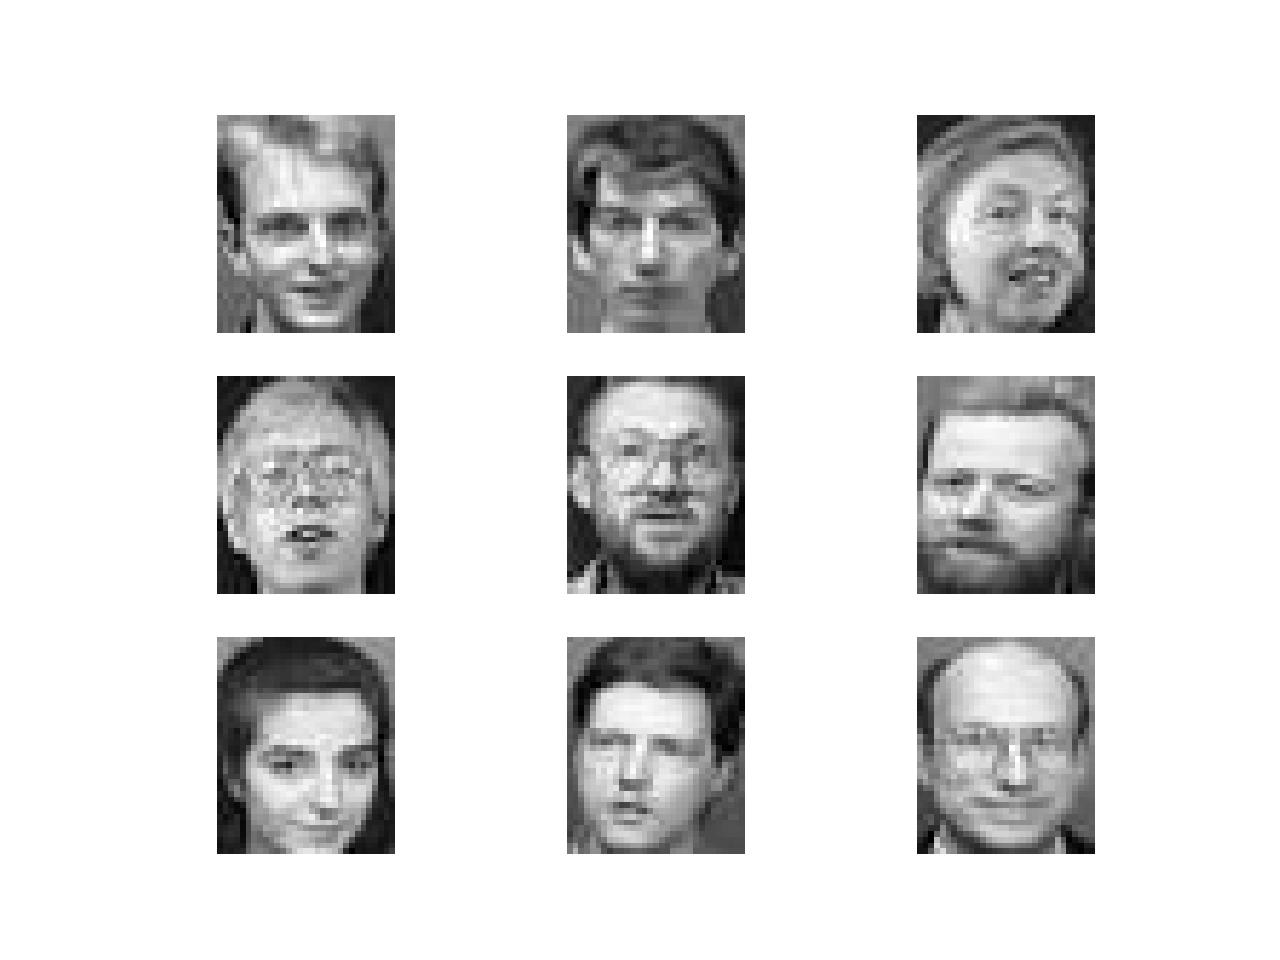

In [5]:
xTr,yTr,xTe,yTe=loaddata("faces.mat")

plt.figure()
plotfaces(xTr[:9, :])


<h4> Implementation </h4>
<p> The following questions will ask you to finish these functions in a pre-defined order. <br></p>

<p>(a) Implement the function  <b><code>l2distance</code></b>. You may use your own code(s) from the previous project.</p>


In [6]:
#<GRADED>
def l2distance(X,Z=None):
    """
    function D=l2distance(X,Z)
    
    Computes the Euclidean distance matrix.
    Syntax:
    D=l2distance(X,Z)
    Input:
    X: nxd data matrix with n vectors (rows) of dimensionality d
    Z: mxd data matrix with m vectors (rows) of dimensionality d
    
    Output:
    Matrix D of size nxm
    D(i,j) is the Euclidean distance of X(i,:) and Z(j,:)
    
    call with only one input:
    l2distance(X)=l2distance(X,X)
    """

    if Z is None:
        Z=X;

    # known issue: if d1 or d2=1, .shape gives back only one value
    n,d1=X.shape
    m,d2=Z.shape
 
    assert (d1==d2), "Dimensions of input vectors must match!"
    
    # initialize empty nxm array
    D = np.empty([n,m])
    
    # loop through all entries and calculate euclidian distance
    # between i-th row in X and j-th row in Z
    for i in range(0, n):
        for j in range(0, m):
            d = 0;
            for k in range(0, d1):
                d += (X[i, k] - Z[j,k])**2
            D[i,j] = np.sqrt(d)
    
    return D
    # ... until here
#</GRADED>

In [7]:
# Code to test l2distance

x = np.array([[1,2,3],[1,1,1]])
y = np.array([[1,2,2],[0,0,0]])

l2distance(x,y)

array([[ 1.        ,  3.74165739],
       [ 1.41421356,  1.73205081]])


<p>(b) Implement the function <b><code>findknn</code></b>, which should find the $k$ nearest neighbors of a set of vectors within a given training data set. The call of 
<pre>
 [I,D]=findknn(xTr,xTe,k);
</pre> 
should result in two matrices $I$ and $D$, both of dimensions $k\times n$, where $n$ is the number of input vectors in <code>xTe</code>. The matrix $I(i,j)$ is the index of the $i^{th}$ nearest neighbor of the vector $xTe(j,:)$. 
So, for example, if we set <code>i=I(1,3)</code>, then <code>xTr(i,:)</code> is the first nearest neighbor of vector <code>xTe(3,:)</code>. The second matrix $D$ returns the corresponding distances. So $D(i,j)$ is the distance of $xTe(j,:)$ to its $i^{th}$ nearest neighbor.
</p>

In [8]:
#<GRADED>
def findknn(xTr,xTe,k):
    """
    function [indices,dists]=findknn(xTr,xTe,k);
    
    Finds the k nearest neighbors of xTe in xTr.
    
    Input:
    xTr = nxd input matrix with n row-vectors of dimensionality d
    xTe = mxd input matrix with m row-vectors of dimensionality d
    k = number of nearest neighbors to be found
    
    Output:
    indices = kxm matrix, where indices(i,j) is the i^th nearest neighbor of xTe(j,:)
    dists = Euclidean distances to the respective nearest neighbors
    """
    n,d1=xTr.shape
    m,d2=xTe.shape
    
    assert (d1==d2), "Dimensions of input vectors must match!"
    
    # get distances of all vectors xTr to all vectors in xTe
    D = l2distance(xTr, xTe)
    
    # sort distances in each column
    dists = np.sort(D, axis = 0)
    # only keep the first k distances
    dists = dists[0:k,:]
    
    # find the position of the row-th largest difference
    indices = np.argsort(D, axis = 0)
    indices = indices[0:k,:]

    return indices, dists
    # until here

#</GRADED>

In [9]:
# Code to test findknn

x = np.array([[0,0,0],[1,0,0]])
y = np.array([[-0.5,0,0],[2,0,0], [1,0,0]])

[I,D] = findknn(y,x,2);
print(I)
print(D)

[[0 2]
 [2 1]]
[[ 0.5  0. ]
 [ 1.   1. ]]


<p> The following demo samples random points in 2D. If your findknn  function is correctly implemented, you should be able to click anywhere on the plot to add a test point. The function should then draw direct connections from your test point to the k  nearest neighbors. Verify manually if your code is correct.
</p>

<IPython.core.display.Javascript object>


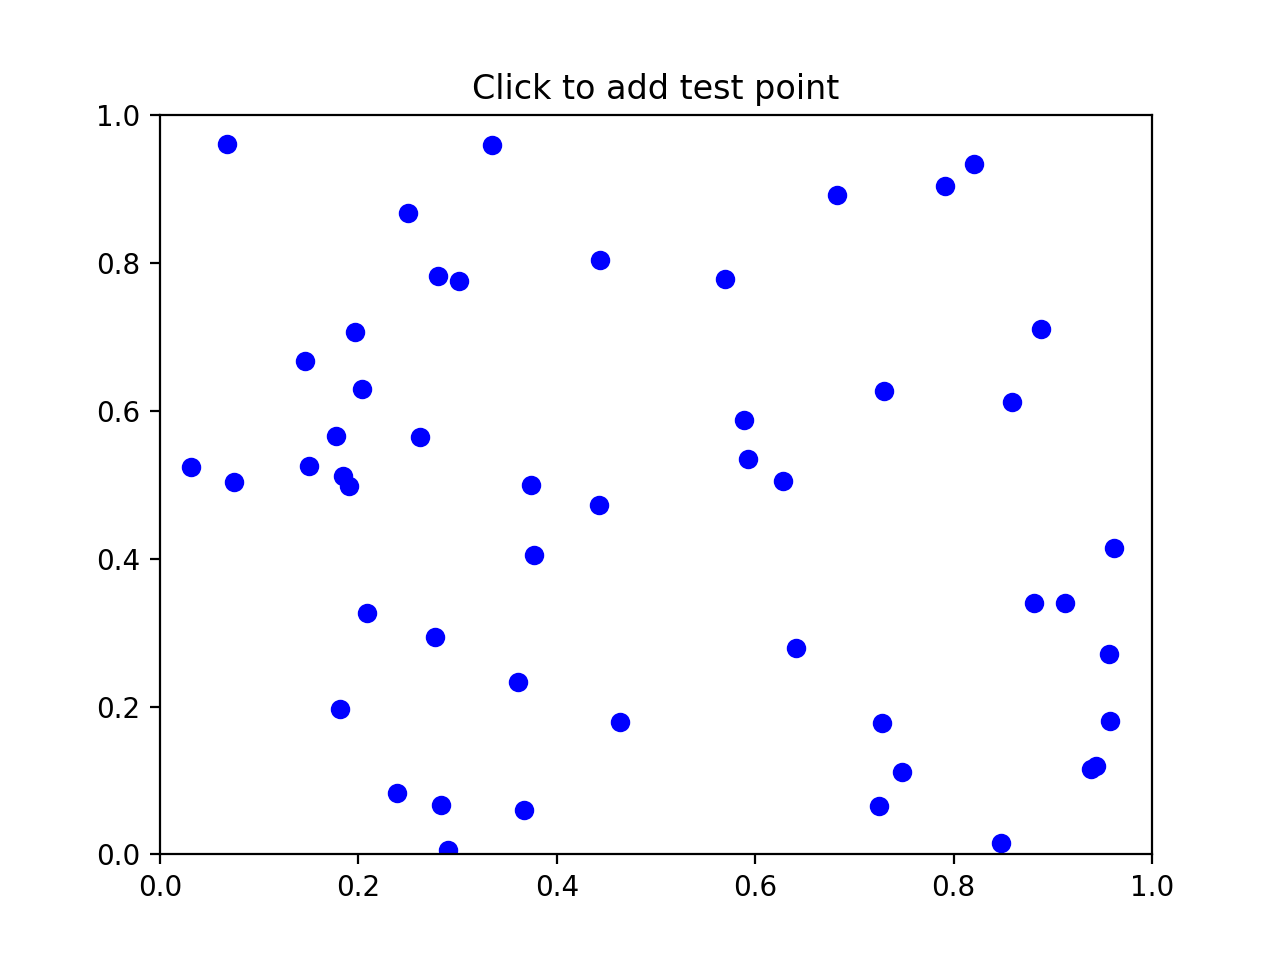

In [10]:
visualize_knn_2D(findknn)

We can visualize the k=3 nearest training neighbors of some of the test points (Click on the image to cycle through different test points). 

<IPython.core.display.Javascript object>


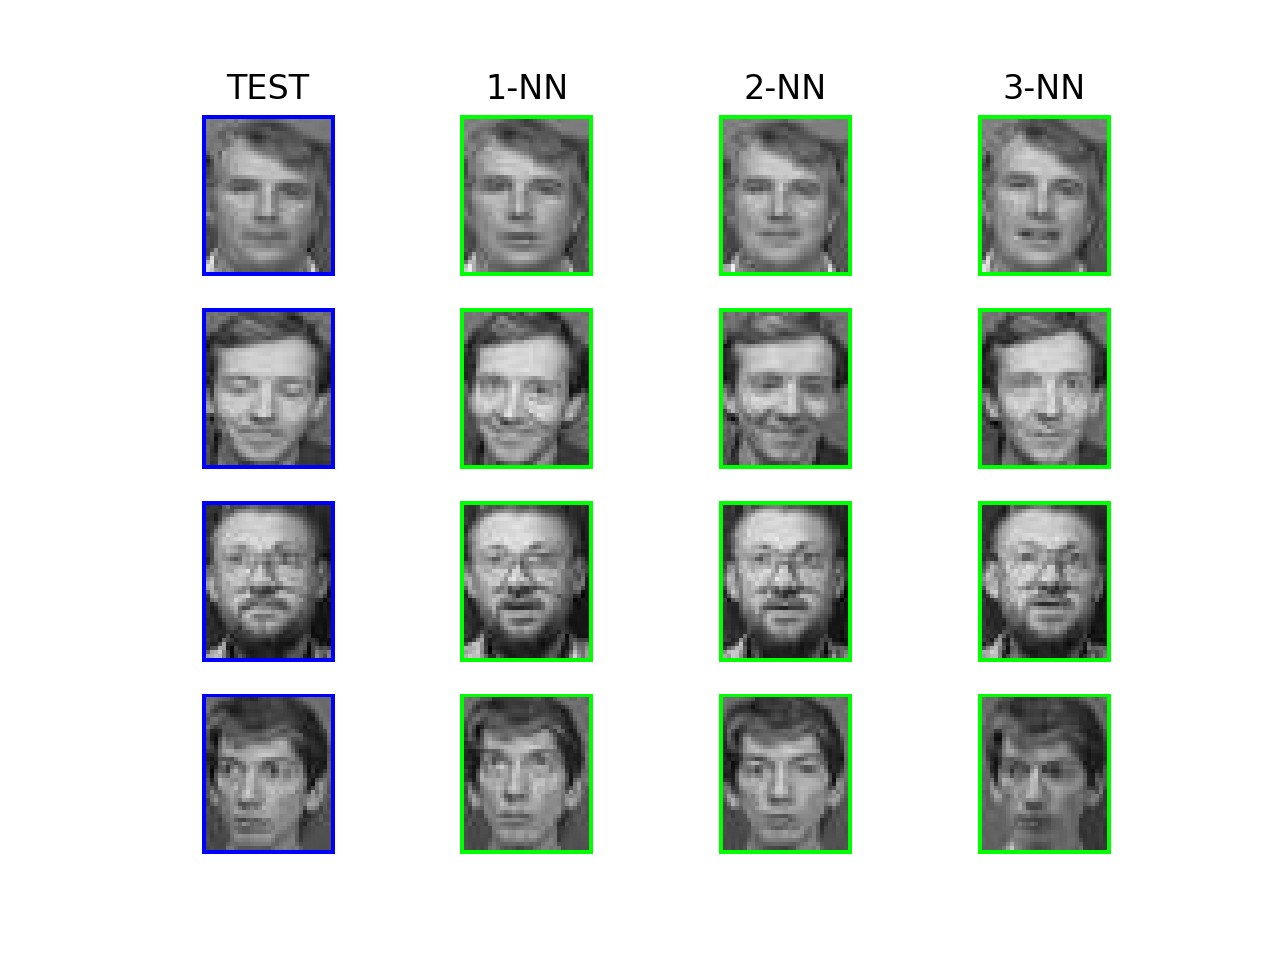

Click on the images above, to cycle through the test images.


In [11]:
visualize_knn_images(findknn, imageType='faces')

<p>(c) The function <b><code>analyze</code></b> should compute various metrics to evaluate a classifier. The call of
<pre>
  result=analyze(kind,truth,preds);
</pre>
should output the <b>accuracy</b> or <b>absolute loss</b> in variable <code>result</code>. The type of output required can be specified in the input argument <code>kind</code> as <code>"abs"</code> or <code>"acc"</code>. The input variables <code>truth</code> and <code>pred</code> should contain vectors of true and predicted labels respectively.
For example, the call
<pre>
>> analyze('acc',[1 2 1 2],[1 2 1 1])
</pre>
should return an accuracy of 0.75. Here, the true labels are 1,2,1,2 and the predicted labels are 1,2,1,1. So the first three examples are classified correctly, and the last one is wrong --- 75% accuracy.
</p>



In [18]:
#<GRADED>
def analyze(kind,truth,preds):
    """
    function output=analyze(kind,truth,preds)         
    Analyses the accuracy of a prediction
    Input:
    kind='acc' classification error
    kind='abs' absolute loss
    (other values of 'kind' will follow later)
    """
    
    truth = truth.flatten()
    preds = preds.flatten()
    
    assert (len(truth)==len(preds)), "Dimensions of input vectors must match!"
    
    if kind == 'abs':
        output = sum(abs(truth-preds))/len(truth)
    elif kind == 'acc':
        # according to Piazza @214 it should be classification error, not accuracy
        # now implemented: classification error
        output = sum(truth!=preds)/len(truth)
    
    return output

#</GRADED>

In [19]:
x = np.array([1, 2, 1, 2])
y = np.array([1, 2, 1, 1])

analyze('acc', x, y)

0.25


<p>(d) Implement the function <b><code>knnclassifier</code></b>, which should perform $k$ nearest neighbor classification on a given test data set. The call <pre>preds=knnclassifier(xTr,yTr,xTe,k)</pre>
should output the predictions for the data in <code>xTe</code> i.e. <code>preds[i]</code> will contain the prediction for <code>xTe[i,:]</code>.</p>

In [20]:
#<GRADED>
        
def knnclassifier(xTr,yTr,xTe,k):
    """
    function preds=knnclassifier(xTr,yTr,xTe,k);
    
    k-nn classifier 
    
    Input:
    xTr = nxd input matrix with n row-vectors of dimensionality d
    xTe = mxd input matrix with m row-vectors of dimensionality d
    k = number of nearest neighbors to be found
    
    Output:
    
    preds = predicted labels, ie preds(i) is the predicted label of xTe(i,:)
    """
    # fix array shapes
    yTr = yTr.flatten()
    
    assert (len(yTr) == xTr.shape[0]), "each training point has to be classified"
    
    [I,D] = findknn(xTr, xTe, k)
    
    # kxm matrix with the classifications of the k nearest neighbors of the vector
    # in the m-th row of xTe
    nn_classifications = yTr[I]
    
    # determine the most common element in the i-th column of nn_classifications
    preds = [np.argmax(np.bincount(nn_classifications[:,i])) for i in range(0,xTe.shape[0])]
    preds = np.array(preds)
    
    return preds

#</GRADED>

In [22]:
x = np.array([[0,0,0],[2,0,0]])
y = np.array([[-0.5,0,0],[2,0,0], [2.1,0,0], [1,0,0]])

yTr = np.array([2,1,2,2])
yTe = np.array([2,2])

print(knnclassifier(y, yTr, x, 3))

analyze("acc", yTe, knnclassifier(y, yTr, x, 3))

[2 2]


0.0

<p>You can compute the actual classification error on the test set by calling
<pre>
>> analyze("acc",yTe,knnclassifier(xTr,yTr,xTe,3))
</pre></p>

<p>(e) This script runs the $k$-nearest neighbor classifier over the faces data set. The faces data set has $40$ classes. What classification accuracy would you expect from a random classifier?</p>

In [23]:
print("Face Recognition: (1-nn)")
xTr,yTr,xTe,yTe=loaddata("faces.mat") # load the data
t0 = time.time()
preds = knnclassifier(xTr,yTr,xTe,1)
result=analyze("acc",yTe,preds)
t1 = time.time()
# Instead of accuracy, there should be error rate
print("You obtained %.2f%% classification acccuracy in %.4f seconds\n" % (result*100.0,t1-t0))

Face Recognition: (1-nn)
You obtained 4.17% classification acccuracy in 33.8041 seconds



In [310]:
# A random classifier with n classification categories will achieve an accuracy of 1/n.
# For 40 classes, this will be 2.5%. We can test this result empirically by simulating
# a random classifier:

n = np.empty(10000)

for i in range(0,10000):
    n[i] = np.mean(np.random.randint(1,41,120)==np.transpose(yTe))
    
# Instead of accuracy, there should be error rate
print( "Accuracy of random classifier: ", np.mean(n)*100, "%")

Accuracy of random classifier:  2.49741666667 %


<p>(f) (optional) Sometimes a $k$-NN classifier can result in a draw, when the majority vote is not clearly defined. Can you improve your accuracy by falling back onto $k$-NN with lower $k$ in such a case?</p>
